In [100]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from matplotlib import cbook as cb

In [49]:
# Create a DataFrame with 100 rows
df = pd.DataFrame(index=range(100))

np.random.seed(10)

# Generate a categorical column
categories = ['Category A', 'Category B', 'Category C']
df['Category'] = np.random.choice(categories, size=len(df))

# Generate a float column
df['Float'] = np.random.rand(len(df))

# Generate an integer column
df['Integer'] = np.random.randint(0, 100, size=len(df))

# Add missing values to the columns
df.loc[np.random.choice(df.index, size=10), 'Category'] = np.nan
df.loc[np.random.choice(df.index, size=10), 'Float'] = np.nan
df.loc[np.random.choice(df.index, size=10), 'Integer'] = np.nan

# Add outliers to the columns
df.loc[np.random.choice(df.index, size=10), 'Float'] = np.random.uniform(100, 1000, size=10)
df.loc[np.random.choice(df.index, size=10), 'Integer'] = np.random.randint(1000, 10000, size=10)

In [50]:
df.head()

,Category,Float,Integer
0,Category B,0.637952,81.0
1,Category B,0.372520,39.0
2,Category A,0.002407,49.0
3,Category A,0.548816,97.0
4,Category B,0.126972,11.0


In [51]:
df.shape

(100, 3)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  91 non-null     object 
 1   Float     91 non-null     float64
 2   Integer   90 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [53]:
df.isnull().sum()

Category     9
Float        9
Integer     10
dtype: int64

In [54]:
# why isnull().sum returns the value of True only per column
print(True == 1)
print(False == 0)

True
True


In [55]:
# category column missing values

df["Category"].value_counts()

Category A    33
Category B    30
Category C    28
Name: Category, dtype: int64

In [56]:
# slicing the dataframe where column Category is missing
missing_category_slice = df.loc[df["Category"].isnull()]

missing_category_slice

,Category,Float,Integer
7,NaN,0.659965,21.0
27,NaN,NaN,74.0
38,NaN,0.465442,82.0
42,NaN,0.606147,61.0
48,NaN,NaN,NaN
57,NaN,NaN,37.0
64,NaN,0.962197,96.0
88,NaN,0.413798,58.0
96,NaN,0.863770,6559.0


In [59]:
# replace a specific value
df.loc[96, "Category"] = "Category C"

In [60]:
df.loc[96]

Category    Category C
Float          0.86377
Integer         6559.0
Name: 96, dtype: object

In [61]:
 # Use loc to replace missing values in the 'Category' column 
# if the value of the 'Float' column is greater than 200

df.loc[df["Float"] > 0.65, "Category"] = "Category A"

In [62]:
# Use loc to replace missing values in the 'Category' column based on multiple conditions
df.loc[(df['Float'] < 1) & (df['Integer'] > 10), 'Category'] = 'Category C'

In [63]:
df.isnull().sum()

Category     2
Float        9
Integer     10
dtype: int64

## Using Fillna

In [64]:
df['Category'].mode()

0    Category C
Name: Category, dtype: object

In [65]:
# Use fillna to replace the remaining missing values in the 'Category' column with the mode
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

In [66]:
df.isnull().sum()

Category     0
Float        9
Integer     10
dtype: int64

In [67]:
s = pd.Series([14, np.nan, np.nan, 10])
s

0    14.0
1     NaN
2     NaN
3    10.0
dtype: float64

In [68]:
# backward fill
s.bfill()

0    14.0
1    10.0
2    10.0
3    10.0
dtype: float64

In [70]:
d = pd.Series([14, np.nan, 10, np.nan])
d

0    14.0
1     NaN
2    10.0
3     NaN
dtype: float64

In [71]:
# backward fill 
d.ffill()

0    14.0
1    14.0
2    10.0
3    10.0
dtype: float64

In [72]:
# Use fillna to fill missing values in the DataFrame using backward fill
df["Float"].fillna(method='bfill', inplace=True)

In [73]:
# replacing missing values with mean 
df["Integer"].fillna(df["Integer"].mean(), inplace = True)

In [74]:
df.isnull().sum()

Category    0
Float       0
Integer     0
dtype: int64

## OutLiers

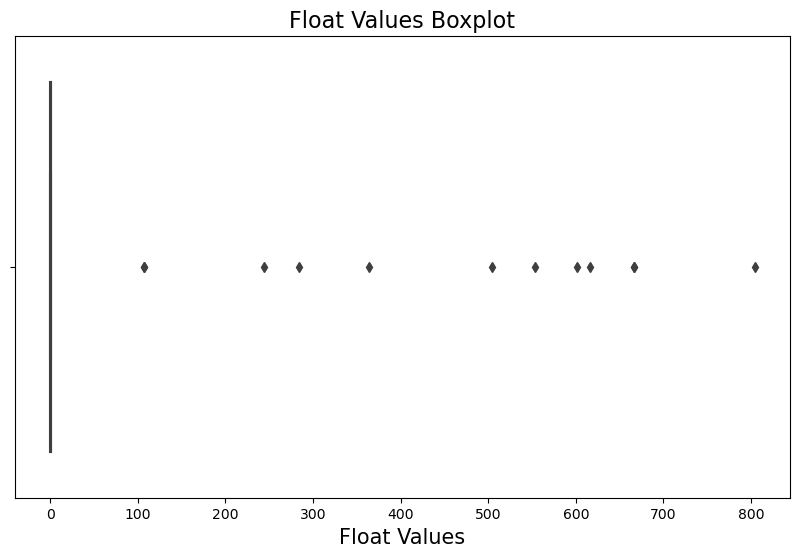

In [31]:
# we can use a box plot to identify outliers

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,6))

sns.boxplot(x="Float", data=df, ax=ax)
ax.set_xlabel("Float Values", fontsize=15)
ax.set_title("Float Values Boxplot", fontsize=16)

plt.show()

fig.savefig("Data/images/floatOutliers.png")

### Using IQR to identify missing values

In [82]:
# get q1
Q1 = df["Float"].quantile(0.25)
# get Q2
Q3 = df["Float"].quantile(0.75)

In [83]:
# get IQR range
IQR = Q3 - Q1

In [84]:
# identify the ouliers
out = ((df["Float"] < (Q1 - 1.5 * IQR)) | (df["Float"] > (Q3 + 1.5 * IQR)))

out

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97     True
98    False
99    False
Name: Float, Length: 100, dtype: bool

In [87]:
outliers_index_list = list(out[out == True].index)
outliers_index_list

[31, 37, 55, 56, 66, 77, 81, 87, 97]

In [88]:
len(outliers_list)

9

In [89]:
outliers = []
for index in outliers_index_list:
    outliers.append(df["Float"][index])
    
outliers
    

[612.3442597311596,
 856.2225844795515,
 431.22401275191345,
 154.04518499573766,
 266.3807949918212,
 471.0484696180606,
 653.2315416821526,
 305.90409988176873,
 822.4983427134217]

In [90]:
df.Float.describe()

count    100.000000
mean      46.125960
std      161.891256
min        0.000273
25%        0.211834
50%        0.398331
75%        0.776397
max      856.222584
Name: Float, dtype: float64

In [95]:
# dataframe where column Float is considered outliers
df[((df["Float"] < (Q1 - 1.5 * IQR)) | (df["Float"] > (Q3 + 1.5 * IQR)))]


,Category,Float,Integer
31,Category A,612.344260,850.466667
37,Category A,856.222584,54.000000
55,Category A,431.224013,96.000000
56,Category A,154.045185,9006.000000
66,Category A,266.380795,63.000000
77,Category A,471.048470,92.000000
81,Category A,653.231542,93.000000
87,Category A,305.904100,34.000000
97,Category A,822.498343,850.466667


In [94]:
# dropping rows with outliers on the float column
new_df = df[~((df["Float"] < (Q1 - 1.5 * IQR)) | (df["Float"] > (Q3 + 1.5 * IQR)))]

new_df.tail()

,Category,Float,Integer
94,Category C,0.961967,91.0
95,Category C,0.261140,16.0
96,Category C,0.863770,6559.0
98,Category C,0.370902,83.0
99,Category C,0.671933,8928.0


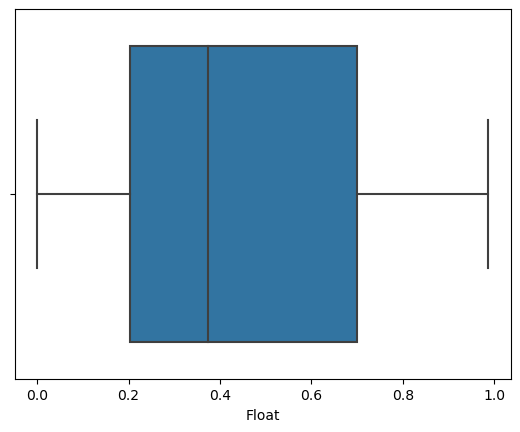

In [99]:
sns.boxplot(x="Float", data=new_df)

plt.show()

In [102]:
stats = cb.boxplot_stats(df["Integer"])
stats

[{'mean': 850.4666666666666,
  'iqr': 60.5,
  'cilo': 51.0015,
  'cihi': 69.9985,
  'whishi': 97.0,
  'whislo': 0.0,
  'fliers': array([7169.        ,  850.46666667, 7088.        ,  850.46666667,
          850.46666667,  850.46666667, 7881.        ,  850.46666667,
         9006.        , 7685.        ,  850.46666667,  850.46666667,
          850.46666667, 5058.        , 5997.        , 7326.        ,
          850.46666667, 6559.        ,  850.46666667, 8928.        ]),
  'q1': 30.75,
  'med': 60.5,
  'q3': 91.25}]